In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

row_data=pd.read_csv('/content/clean_data2.csv')
df= row_data.copy()
df.head()

In [ ]:
df=df.drop(columns=['user_uuid','restaurant_uuid','cuisine'])

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df=df.drop(columns='Unnamed: 0')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X=df.drop(columns='Ratings')
y=df['Ratings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=40)

In [ ]:
Lr=LogisticRegression(solver="liblinear", random_state=0)
Lr.fit(X_train,y_train)
lr_pred=Lr.predict(X_test)
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           1       0.69      0.69      0.69      2220
           2       0.65      0.53      0.58      2161
           3       0.61      0.54      0.57      2555
           4       0.70      0.70      0.70      3465
           5       0.85      0.95      0.90      5478

    accuracy                           0.74     15879
   macro avg       0.70      0.68      0.69     15879
weighted avg       0.73      0.74      0.73     15879



In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2002
           2       0.00      0.00      0.00      1885
           3       0.00      0.00      0.00      2336
           4       0.00      0.00      0.00      3149
           5       0.34      1.00      0.51      4920

    accuracy                           0.34     14292
   macro avg       0.07      0.20      0.10     14292
weighted avg       0.12      0.34      0.18     14292



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(svc.score(X_test,y_test))

0.34424853064651556


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2002
           2       0.99      1.00      0.99      1885
           3       1.00      1.00      1.00      2336
           4       1.00      1.00      1.00      3149
           5       1.00      1.00      1.00      4920

    accuracy                           1.00     14292
   macro avg       1.00      1.00      1.00     14292
weighted avg       1.00      1.00      1.00     14292

0.9976910159529807


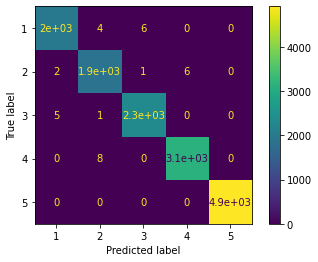

In [ ]:
# Import machine learning algorithmn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
# Instantiatie the classifier
random_forest = RandomForestClassifier(max_samples=0.8,random_state=0)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict on test dataset
y_pred_random_forest = random_forest.predict(X_test)

# Print classification report on test dataset
print(classification_report(y_test,y_pred_random_forest))
plot_confusion_matrix(random_forest, X_test, y_test) 
print(random_forest.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

gbt = GBC(n_estimators=300, max_depth=1, random_state=15)
gbt.fit(X_train,y_train)
y_pred_gbt = gbt.predict(X_test)

# Print classification report on test dataset
print(classification_report(y_test,y_pred_gbt))
print(gbt.score(X_test,y_test))

              precision    recall  f1-score   support

           1       0.58      0.59      0.59      2220
           2       0.58      0.41      0.48      2161
           3       0.53      0.36      0.43      2555
           4       0.64      0.58      0.61      3465
           5       0.70      0.92      0.79      5478

    accuracy                           0.64     15879
   macro avg       0.61      0.57      0.58     15879
weighted avg       0.63      0.64      0.62     15879

0.6396498520057938


In [ ]:
from sklearn.model_selection import GridSearchCV
params_rf = {'n_estimators': [300, 400, 500],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [0.1, 0.2],
             'max_features': ['log2', 'sqrt']
             }
grid_rf = GridSearchCV(estimator=random_forest,
                       param_grid=params_rf,
                       cv=5,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1
                       )
grid_rf.fit(X_train,y_train)
best_model = grid_rf.best_estimator_


best_random = best_model.predict(X_test)
print(classification_report(y_test,best_random))
print(best_model.score(X_test,y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.2min finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2220
           2       0.00      0.00      0.00      2161
           3       0.00      0.00      0.00      2555
           4       0.00      0.00      0.00      3465
           5       0.34      1.00      0.51      5478

    accuracy                           0.34     15879
   macro avg       0.07      0.20      0.10     15879
weighted avg       0.12      0.34      0.18     15879

0.34498394105422253


In [ ]:
# Import machine learning algorithmn
from sklearn.ensemble import RandomForestClassifier

# Instantiatie the classifier
random_forest = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)

# Fit the model
random_forest.fit(X_train, y_train)

# Predict on test dataset
y_pred_random_forest = random_forest.predict(X_test)

# Print classification report on test dataset
print(classification_report(y_test,y_pred_random_forest))
print(random_forest.score(X_test,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2002
           2       0.99      1.00      0.99      1885
           3       1.00      1.00      1.00      2336
           4       1.00      1.00      1.00      3149
           5       1.00      1.00      1.00      4920

    accuracy                           1.00     14292
   macro avg       1.00      1.00      1.00     14292
weighted avg       1.00      1.00      1.00     14292

0.9975510775258886


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1, random_state=12)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
adb_clf.fit(X_train, y_train)
adb_pred=adb_clf.predict(X_test)
print(classification_report(y_test,adb_pred))
print(adb_clf.score(X_test,y_test))

              precision    recall  f1-score   support

           1       0.44      0.61      0.51      2002
           2       0.34      0.24      0.28      1885
           3       0.38      0.35      0.36      2336
           4       0.42      0.56      0.48      3149
           5       0.78      0.60      0.67      4920

    accuracy                           0.50     14292
   macro avg       0.47      0.47      0.46     14292
weighted avg       0.53      0.50      0.51     14292

0.5026588301147495


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print(knn.score(X_test,y_test))

              precision    recall  f1-score   support

           1       0.14      0.09      0.11      2002
           2       0.14      0.07      0.09      1885
           3       0.15      0.09      0.12      2336
           4       0.21      0.21      0.21      3149
           5       0.34      0.54      0.42      4920

    accuracy                           0.27     14292
   macro avg       0.20      0.20      0.19     14292
weighted avg       0.23      0.27      0.24     14292

0.2663727959697733
